The goal of this **Exploratory Data Analysis**, is to assess how relevant this dataset is for our Matching Algorithm project. Possible things to evaluate are:

1. How are job posting across different platforms structured and find typical job requirements.

2. Utilize multiple visualizations techniques to find possible hidden patterns. 

## Steps to follow:

- Basic Preprocessing 
- Basic Information and Descriptive Statistics
- Correlation Analysis
- Visualizations

## Things to consider: 

Possible imbalance Class Problem

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import gc
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, mean_absolute_error
#from bayes_opt import BayesianOptimization
#import scikitplot as skplt
#import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [5]:

job = pd.read_csv("jobss.csv")
pd.set_option('display.max_columns', None)

print(job.columns.to_list())

['Job Title', 'Unnamed: 1', 'Job Experience Required', 'Key Skills', 'Role Category', 'Location', 'Functional Area', 'Industry', 'Role', 'Longitude', 'Latitude', 'sal']


## Basic Information and Descriptive Statistics

In [6]:
job.drop("Unnamed: 1", axis = 1, inplace=True)
job.head()

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 Longitude 
 Latitude 
 sal 
 
 
 
 
 0 
 Digital Media Planner 
 5 - 10 yrs 
 Media Planning| Digital Media 
 Advertising 
 Mumbai 
 Marketing , Advertising , MR , PR , Media Plan... 
 Advertising, PR, MR, Event Management 
 Media Planning Executive/Manager 
 72.877393 
 19.075990 
 3855 
 
 
 1 
 Online Bidding Executive 
 2 - 5 yrs 
 pre sales| closing| software knowledge| clien... 
 Retail Sales 
 Pune,Pune 
 Sales , Retail , Business Development 
 IT-Software, Software Services 
 Sales Executive/Officer 
 73.854454 
 18.521428 
 2639 
 
 
 2 
 Trainee Research/ Research Executive- Hi- Tec... 
 0 - 1 yrs 
 Computer science| Fabrication| Quality check|... 
 R&D 
 Gurgaon 
 Engineering Design , R&D 
 Recruitment, Staffing 
 R&D Executive 
 77.002700 
 28.428262 
 2156 
 
 
 3 
 Technical Support 
 0 - 5 yrs 
 Technical Support 
 Admin/Maintenance/Security/Datawarehousing 
 Mumbai 
 IT Software - Application Programming , Mainte... 
 IT-Software, Software Services 
 Technical Support Engineer 
 72.877393 
 19.075990 
 4059 
 
 
 4 
 Software Test Engineer -hyderabad 
 2 - 5 yrs 
 manual testing| test engineering| test cases|... 
 Programming & Design 
 Hyderabad 
 IT Software - QA & Testing 
 IT-Software, Software Services 
 Testing Engineer 
 78.474061 
 17.360589 
 5347

In [8]:
#Numerical columns
num = job.select_dtypes(exclude='O')
num.head(5)

Longitude 
 Latitude 
 sal 
 
 
 
 
 0 
 72.877393 
 19.075990 
 3855 
 
 
 1 
 73.854454 
 18.521428 
 2639 
 
 
 2 
 77.002700 
 28.428262 
 2156 
 
 
 3 
 72.877393 
 19.075990 
 4059 
 
 
 4 
 78.474061 
 17.360589 
 5347

In [10]:
#categorical columns
cat = job.select_dtypes(include='O')
cat.head(5)

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 
 
 
 
 0 
 Digital Media Planner 
 5 - 10 yrs 
 Media Planning| Digital Media 
 Advertising 
 Mumbai 
 Marketing , Advertising , MR , PR , Media Plan... 
 Advertising, PR, MR, Event Management 
 Media Planning Executive/Manager 
 
 
 1 
 Online Bidding Executive 
 2 - 5 yrs 
 pre sales| closing| software knowledge| clien... 
 Retail Sales 
 Pune,Pune 
 Sales , Retail , Business Development 
 IT-Software, Software Services 
 Sales Executive/Officer 
 
 
 2 
 Trainee Research/ Research Executive- Hi- Tec... 
 0 - 1 yrs 
 Computer science| Fabrication| Quality check|... 
 R&D 
 Gurgaon 
 Engineering Design , R&D 
 Recruitment, Staffing 
 R&D Executive 
 
 
 3 
 Technical Support 
 0 - 5 yrs 
 Technical Support 
 Admin/Maintenance/Security/Datawarehousing 
 Mumbai 
 IT Software - Application Programming , Mainte... 
 IT-Software, Software Services 
 Technical Support Engineer 
 
 
 4 
 Software Test Engineer -hyderabad 
 2 - 5 yrs 
 manual testing| test engineering| test cases|... 
 Programming & Design 
 Hyderabad 
 IT Software - QA & Testing 
 IT-Software, Software Services 
 Testing Engineer

In [11]:
job.describe()

Longitude 
 Latitude 
 sal 
 
 
 
 
 count 
 473.000000 
 473.000000 
 500.000000 
 
 
 mean 
 75.988498 
 21.089736 
 4224.594000 
 
 
 std 
 14.397788 
 7.080071 
 1598.716696 
 
 
 min 
 -79.030572 
 -8.123729 
 1510.000000 
 
 
 25% 
 73.854454 
 17.360589 
 2864.250000 
 
 
 50% 
 77.121215 
 19.075990 
 4213.000000 
 
 
 75% 
 77.590082 
 28.428262 
 5623.000000 
 
 
 max 
 121.097753 
 46.314475 
 6991.000000

In [12]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Job Experience Required  500 non-null    object 
 2   Key Skills               500 non-null    object 
 3   Role Category            463 non-null    object 
 4   Location                 489 non-null    object 
 5   Functional Area          489 non-null    object 
 6   Industry                 489 non-null    object 
 7   Role                     486 non-null    object 
 8   Longitude                473 non-null    float64
 9   Latitude                 473 non-null    float64
 10  sal                      500 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 43.1+ KB


In [6]:
job["Job Title"].value_counts()

Job Title
 Business Development Manager 4
 Java Developer 3
 PHP Developer 3
 Key Accounts Manager 2
 Sales Executive 2
 ..
Java Enterprise Edition 1
 Inbound Phone Banking Voice Process - Leading Bank - Noida 1
 Software Development / Software Engineer 1
 Technical / Functional Skills 1
 Tech caller hiring a huge number of Executives. 1
Name: count, Length: 471, dtype: int64

In [13]:
job[job.duplicated()]

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 Longitude 
 Latitude 
 sal

In [15]:
print(job.shape)
print(job.apply(lambda col: col.unique())) 

table = pd.DataFrame({
    'Unique':job.nunique(),
    'Null':job.isna().sum(),
    'NullPercent':job.isna().sum() / len(job),
    'Type':job.dtypes.values
})
display(table)

(500, 11)
Job Title                  [ Digital Media Planner,  Online Bidding Execu...
Job Experience Required    [5 - 10 yrs, 2 - 5 yrs, 0 - 1 yrs, 0 - 5 yrs, ...
Key Skills                 [ Media Planning| Digital Media,  pre sales| c...
Role Category              [Advertising, Retail Sales, R&D, Admin/Mainten...
Location                   [Mumbai, Pune,Pune, Gurgaon, Hyderabad, Pune, ...
Functional Area            [Marketing , Advertising , MR , PR , Media Pla...
Industry                   [Advertising, PR, MR, Event Management, IT-Sof...
Role                       [Media Planning Executive/Manager, Sales Execu...
Longitude                  [72.8773928, 73.8544541, 77.00270015, 78.47406...
Latitude                   [19.0759899, 18.521428, 28.42826235, 17.360589...
sal                        [3855, 2639, 2156, 4059, 5347, 4838, 2585, 391...
dtype: object


Unique 
 Null 
 NullPercent 
 Type 
 
 
 
 
 Job Title 
 471 
 11 
 0.022 
 object 
 
 
 Job Experience Required 
 76 
 0 
 0.000 
 object 
 
 
 Key Skills 
 473 
 0 
 0.000 
 object 
 
 
 Role Category 
 59 
 37 
 0.074 
 object 
 
 
 Location 
 101 
 11 
 0.022 
 object 
 
 
 Functional Area 
 40 
 11 
 0.022 
 object 
 
 
 Industry 
 53 
 11 
 0.022 
 object 
 
 
 Role 
 138 
 14 
 0.028 
 object 
 
 
 Longitude 
 52 
 27 
 0.054 
 float64 
 
 
 Latitude 
 52 
 27 
 0.054 
 float64 
 
 
 sal 
 479 
 0 
 0.000 
 int64

In [9]:
job.isnull().sum()

Job Title 11
Job Experience Required 0
Key Skills 0
Role Category 37
Location 11
Functional Area 11
Industry 11
Role 14
Longitude 27
Latitude 27
sal 0
dtype: int64

In [ ]:
#Delete all rows without a NaN
#job_cleaned = job.dropna()

In [10]:
job[job["Location"].isnull().values==True]

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 Longitude 
 Latitude 
 sal 
 
 
 
 
 59 
 NaN 
 vide 
 Marketing|Executive|Marketing|Marketing|Execut... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 2709 
 
 
 62 
 NaN 
 vide 
 Manager|Transformation|Manager|Transformation|... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 3764 
 
 
 116 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 6431 
 
 
 168 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 6449 
 
 
 172 
 NaN 
 vide 
 Sales|Counter|Sales|Sales|Sales|Sales|Counter|... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 4015 
 
 
 186 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 4662 
 
 
 212 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 1660 
 
 
 277 
 NaN 
 vide 
 networking|Network|Lead|Network|Lead|Network|N... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 4450 
 
 
 441 
 NaN 
 vide 
 Java|Trainer|Java|trainer|Trainer|java|Trainer... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 6310 
 
 
 467 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 5477 
 
 
 476 
 NaN 
 vide 
 vide 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 11.048029 
 46.314475 
 5421

In [11]:
job.dropna(axis=0, subset=["Location"], inplace=True)
job.isnull().sum()

Job Title 0
Job Experience Required 0
Key Skills 0
Role Category 26
Location 0
Functional Area 0
Industry 0
Role 3
Longitude 27
Latitude 27
sal 0
dtype: int64

In [12]:
job.to_csv("/data/notebook_files/jobs-edited.csv")

## Visualization and correlation analysis using new libraries

In [13]:
training_data = job.sample(frac=0.8, random_state=25)
testing_data = job.drop(training_data.index)

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(job, test_size=0.2, random_state=25)

In [15]:
train_data.head()

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 Longitude 
 Latitude 
 sal 
 
 
 
 
 365 
 HCL Tech Hiring "physical Design Engineers" f... 
 5 - 10 yrs 
 pnr| primetime| sta| floorplan| timing closur... 
 Engineering Design 
 Bengaluru,Chennai,Hyderabad,Greater Noida 
 Engineering Design , R&D 
 Semiconductors, Electronics 
 Senior Design Engineer 
 NaN 
 NaN 
 3684 
 
 
 138 
 Assistant Manager – BI&I (data Automation) 
 5 - 7 Years 
 C#|Application Development|Senior Level|MS SQL... 
 Admin/Maintenance/Security/Datawarehousing 
 Mumbai 
 IT Software - Application Programming , Mainte... 
 Banking / Financial Services / Broking 
 IT/Networking-Manager 
 72.877393 
 19.075990 
 1565 
 
 
 4 
 Software Test Engineer -hyderabad 
 2 - 5 yrs 
 manual testing| test engineering| test cases|... 
 Programming & Design 
 Hyderabad 
 IT Software - QA & Testing 
 IT-Software, Software Services 
 Testing Engineer 
 78.474061 
 17.360589 
 5347 
 
 
 173 
 CRM 
 1 - 2 yrs 
 Customer relationship| Automobile| Proposal p... 
 Corporate Sales 
 Bengaluru 
 Sales , Retail , Business Development 
 IT-Software, Software Services 
 Sales/Business Development Manager 
 77.590082 
 12.976794 
 5386 
 
 
 65 
 Head Sales- Coworking Company 
 7 - 12 yrs 
 Sales| Team Building| Strategic Leadership| R... 
 Senior Management 
 Delhi NCR 
 Sales , Retail , Business Development 
 Real Estate, Property 
 Head/VP/GM/National Manager -Sales 
 77.121215 
 28.688244 
 6305

In [16]:
train_data =train_data.fillna(method= "ffill")
test_data =test_data.fillna(method= "ffill")

## This time I decided try out some new libraries to find new insights

In [17]:
! pip install sweetviz


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


<iframe width="100%" height="750" srcdoc="<!doctype html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <link rel="icon" href="" type="image/x-icon" />
 <script> /*! jQuery v3.7.1 | (c) OpenJS Foundation and other contributors | jquery.org/license */
!function(e,t){"use strict";"object"==typeof module&&"object"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error("jQuery requires a window with a document");return t(e)}:t(e)}("undefined"!=typeof window?window:this,function(ie,e){"use strict";var oe=[],r=Object.getPrototypeOf,ae=oe.slice,g=oe.flat?function(e){return oe.flat.call(e)}:function(e){return oe.concat.apply([],e)},s=oe.push,se=oe.indexOf,n={},i=n.toString,ue=n.hasOwnProperty,o=ue.toString,a=o.call(Object),le={},v=function(e){return"function"==typeof e&&"number"!=typeof e.nodeType&&"function"!=typeof e.item},y=function(e){return null!=e&&e===e.window},C=ie.document,u={type:!0,src:!0,nonce:!0,noModule:!0};function m(e,t,n){var r,i,o=(n=n||C).createElement("script");if(o.text=e,t)for(r in u)(i=t[r]||t.getAttribute&&t.getAttribute(r))&&o.setAttribute(r,i);n.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+"":"object"==typeof e||"function"==typeof e?n[i.call(e)]||"object":typeof e}var t="3.7.1",l=/HTML$/i,ce=function(e,t){return new ce.fn.init(e,t)};function c(e){var t=!!e&&"length"in e&&e.length,n=x(e);return!v(e)&&!y(e)&&("array"===n||0===t||"number"==typeof t&&0<t&&t-1 in e)}function fe(e,t){return e.nodeName&&e.nodeName.toLowerCase()===t.toLowerCase()}ce.fn=ce.prototype={jquery:t,constructor:ce,length:0,toArray:function(){return ae.call(this)},get:function(e){return null==e?ae.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=ce.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return ce.each(this,e)},map:function(n){return this.pushStack(ce.map(this,function(e,t){return n.call(e,t,e)}))},slice:function(){return this.pushStack(ae.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},even:function(){return this.pushStack(ce.grep(this,function(e,t){return(t+1)%2}))},odd:function(){return this.pushStack(ce.grep(this,function(e,t){return t%2}))},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(0<=n&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:oe.sort,splice:oe.splice},ce.extend=ce.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for("boolean"==typeof a&&(l=a,a=arguments[s]||{},s++),"object"==typeof a||v(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)r=e[t],"__proto__"!==t&&a!==r&&(l&&r&&(ce.isPlainObject(r)||(i=Array.isArray(r)))?(n=a[t],o=i&&!Array.isArray(n)?[]:i||ce.isPlainObject(n)?n:{},i=!1,a[t]=ce.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},ce.extend({expando:"jQuery"+(t+Math.random()).replace(/\D/g,""),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||"[object Object]"!==i.call(e))&&(!(t=r(e))||"function"==typeof(n=ue.call(t,"constructor")&&t.constructor)&&o.call(n)===a)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e,t,n){m(e,{nonce:t&&t.nonce},n)},each:function(e,t){var n,r=0;if(c(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},text:function(e){var t,n="",r=0,i=e.nodeType;if(!i)while(t=e[r++])n+=ce.text(t);return 1===i||11===i?e.textContent:9===i?e.documentElement.textContent:3===i||4===i?e.nodeValue:n},makeArray:function(e,t){var n=t||[];return null!=e&&(c(Object(e))?ce.merge(n,"string"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:se.call(t,e,n)},isXMLDoc:function(e){var t=e&&e.namespaceURI,n=e&&(e.ownerDocument||e).documentElement;return!l.test(t||n&&n.nodeName||"HTML")},merge:function(e,t){for(var n=+t.length,r=0,i=e.le
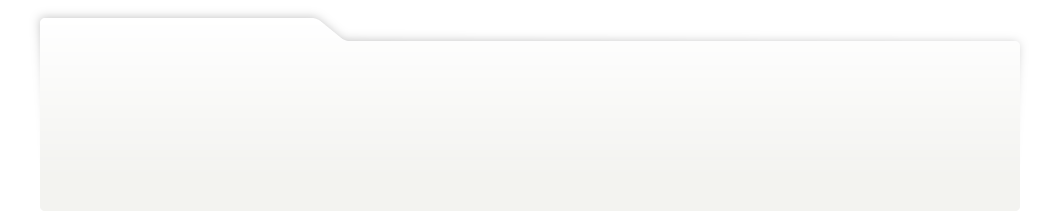
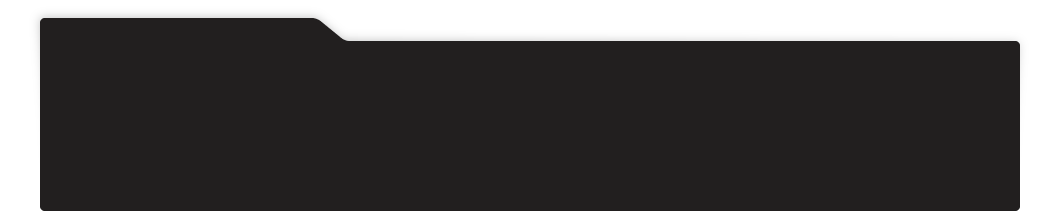
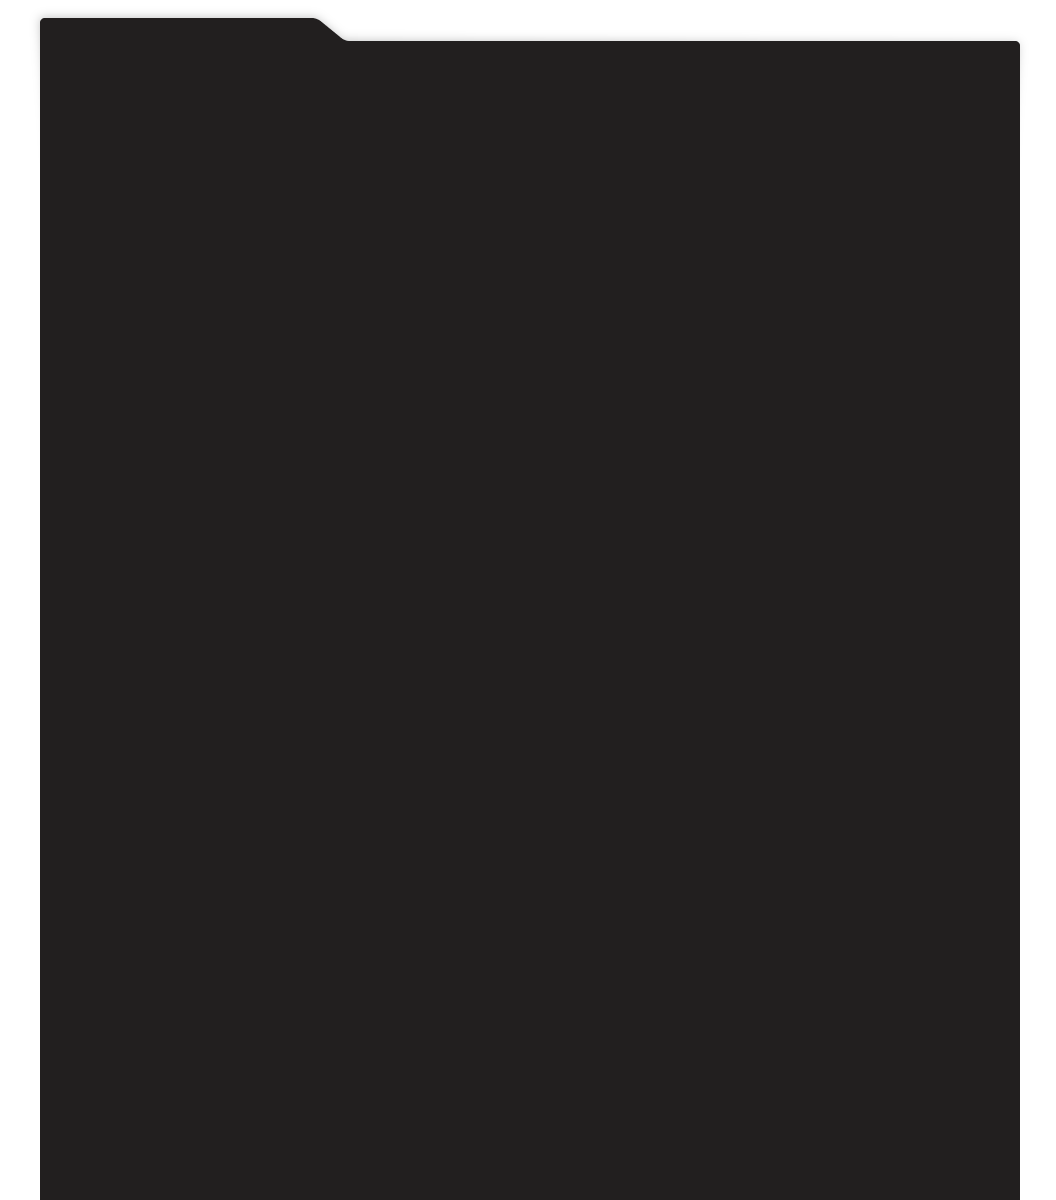
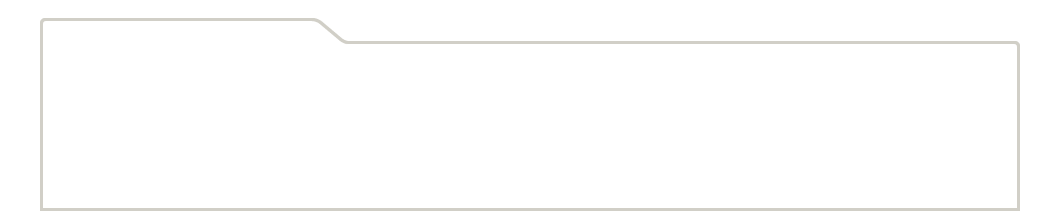
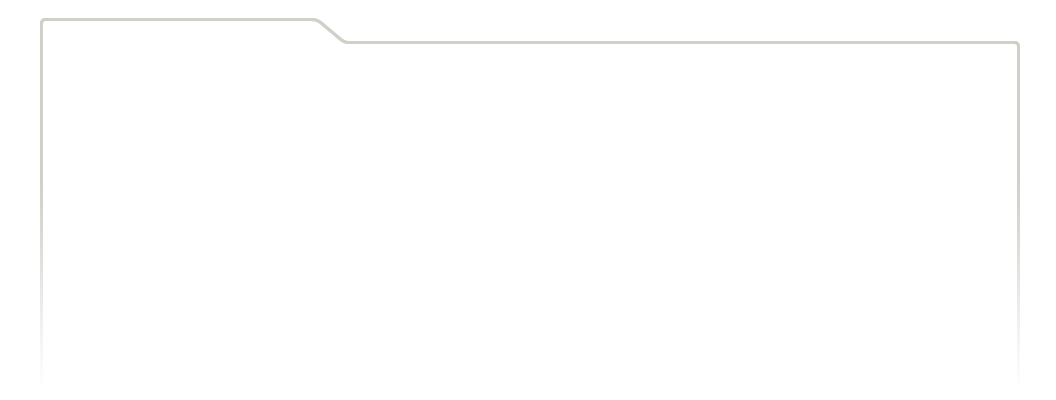
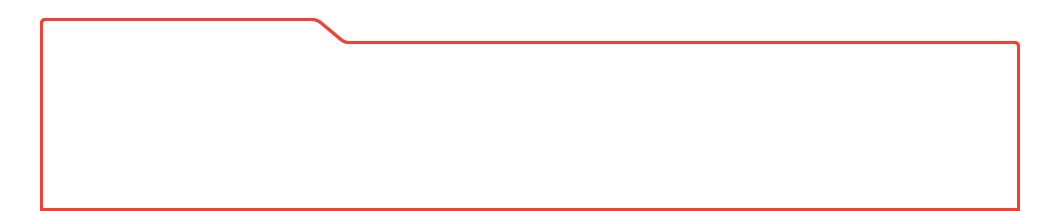
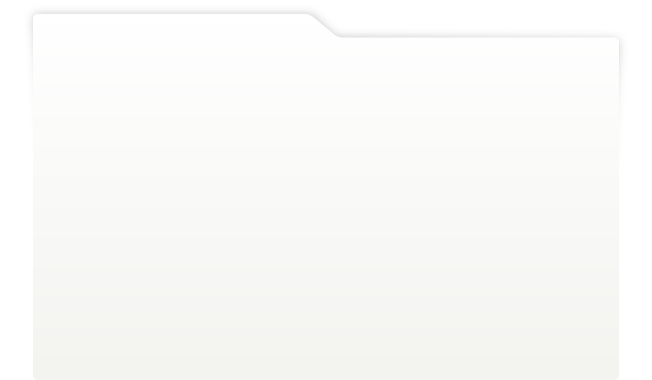
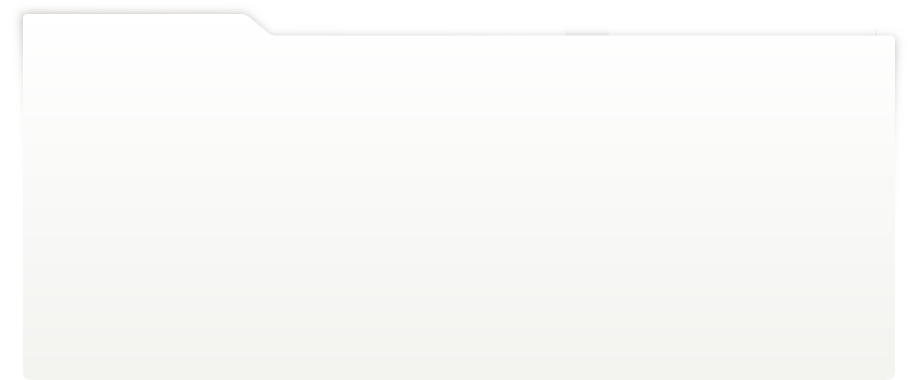
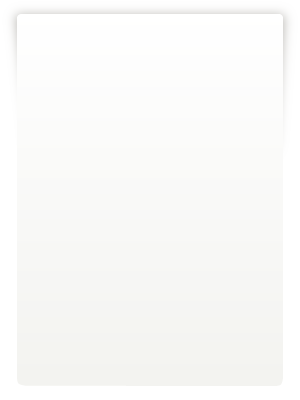
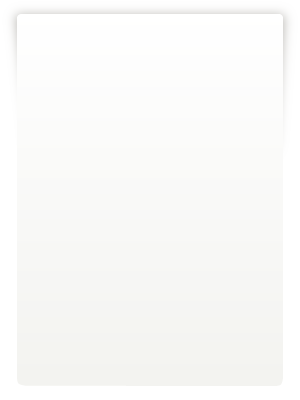
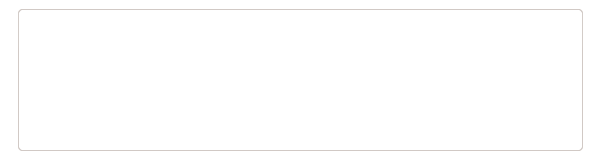
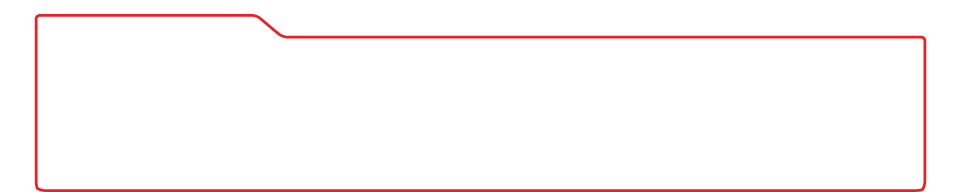
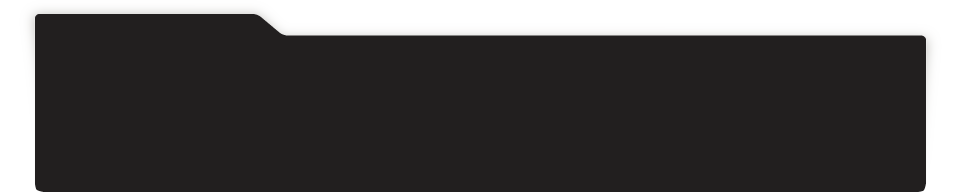
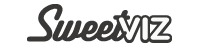
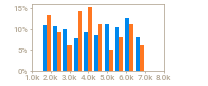
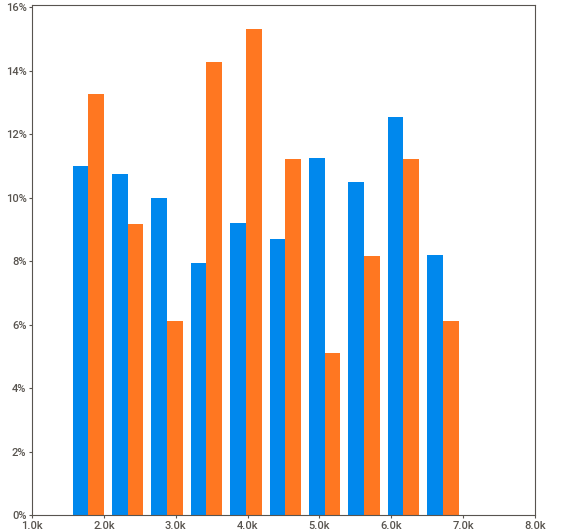
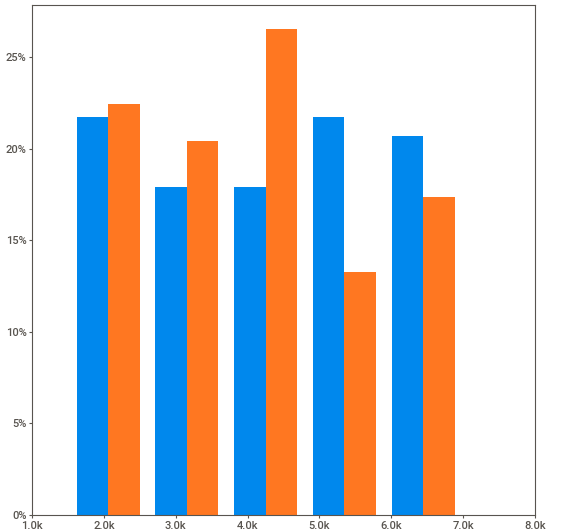
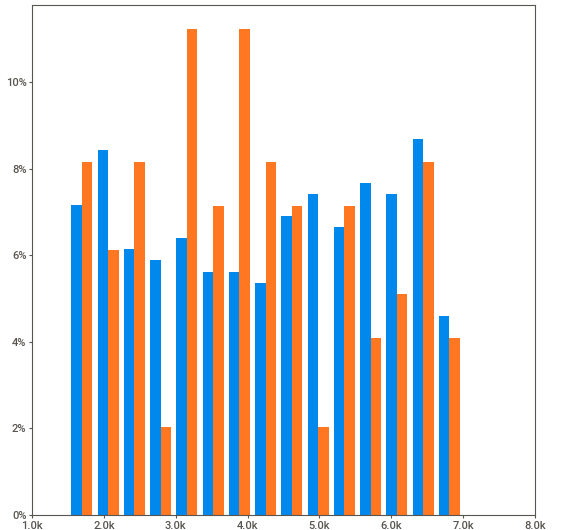
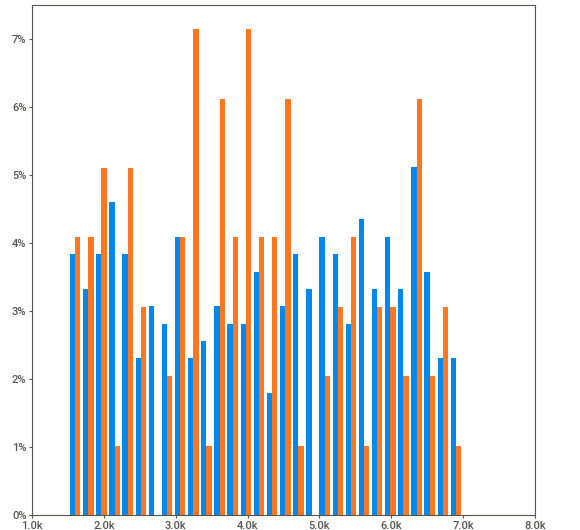
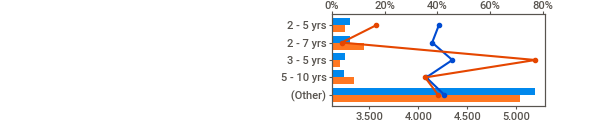
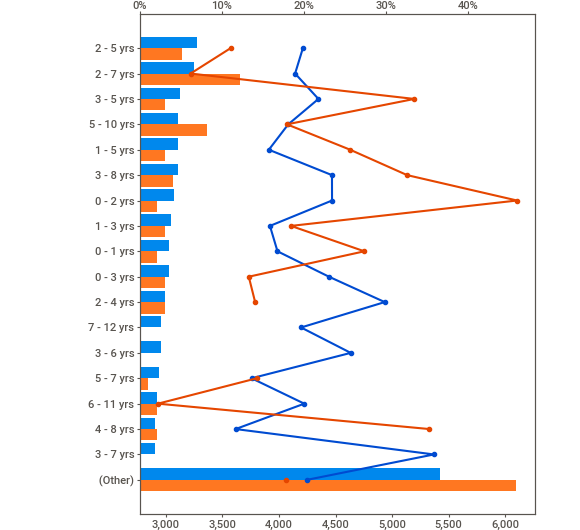
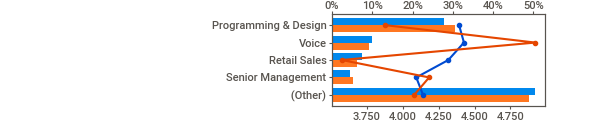
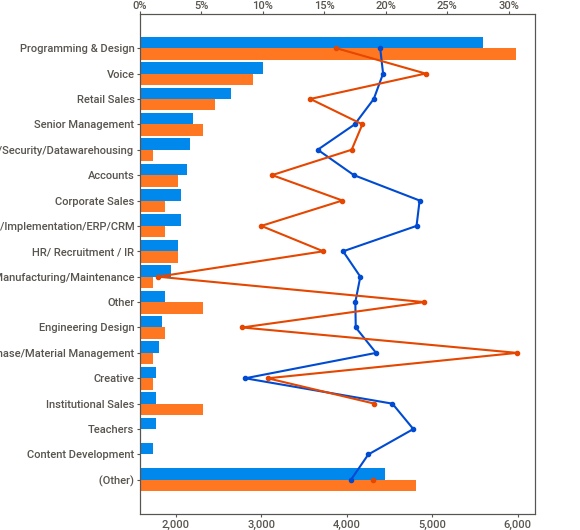
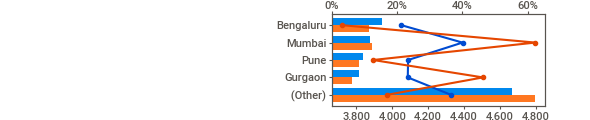
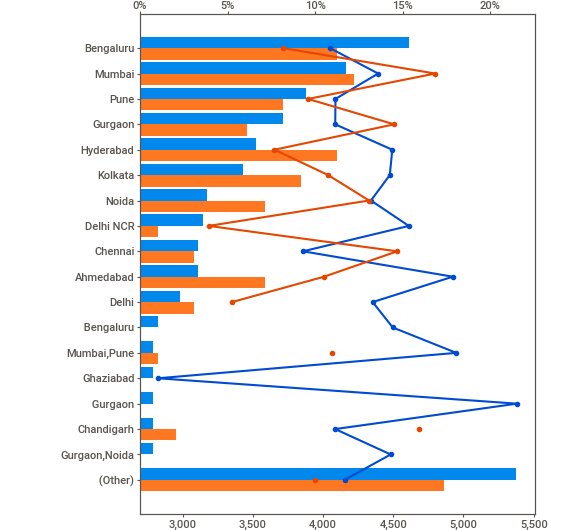
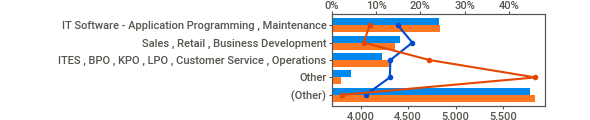
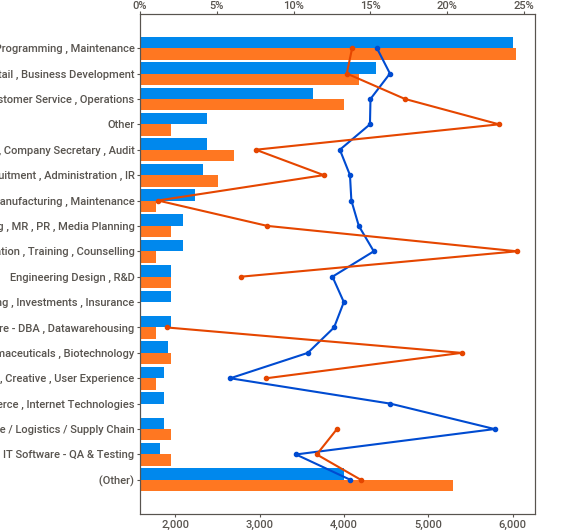
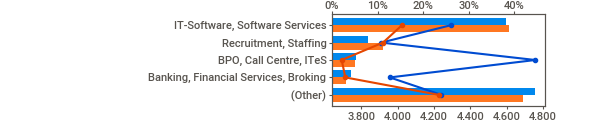
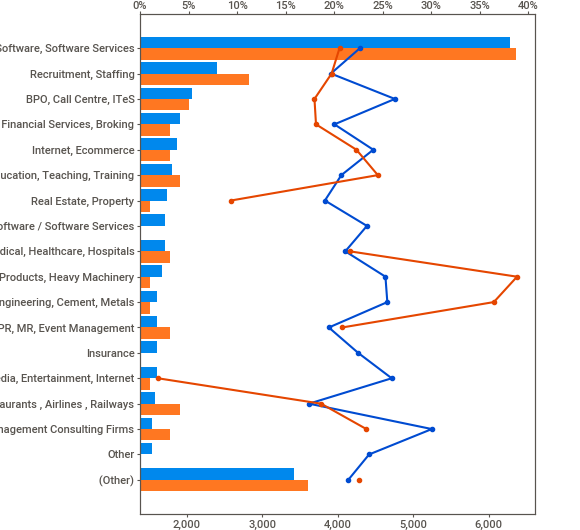
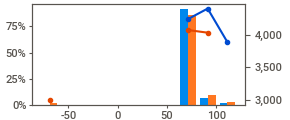
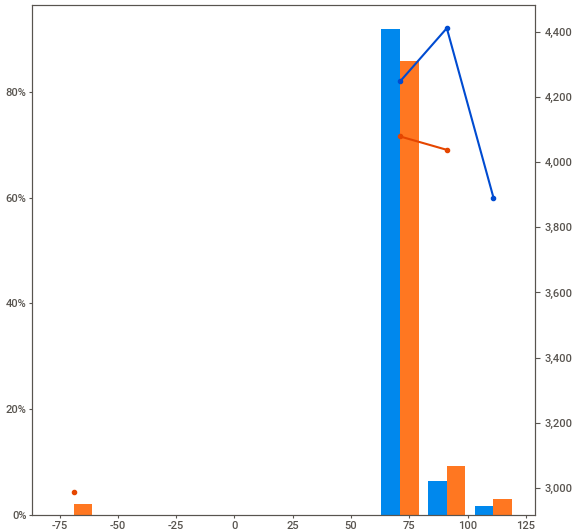
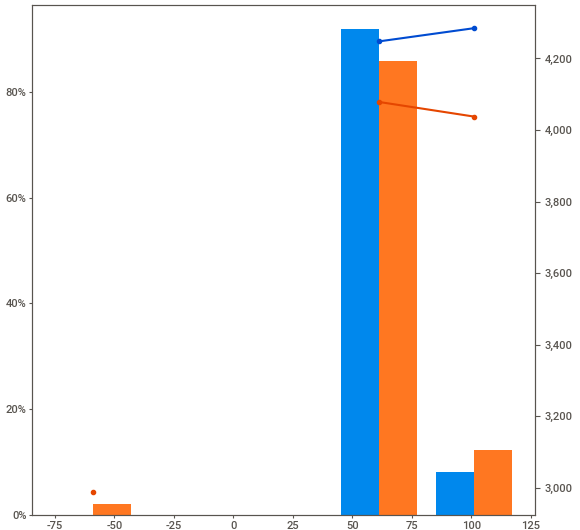
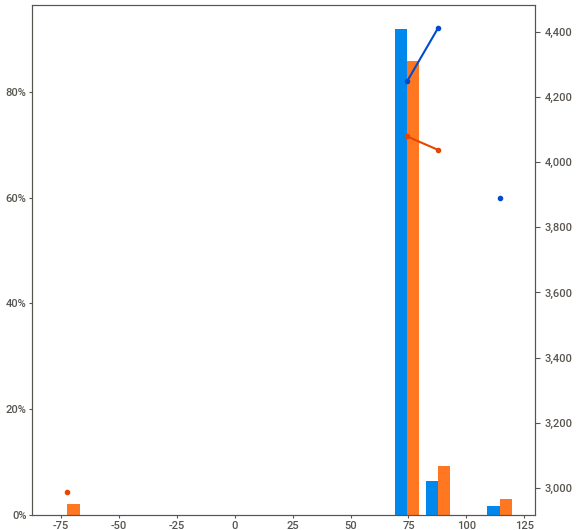
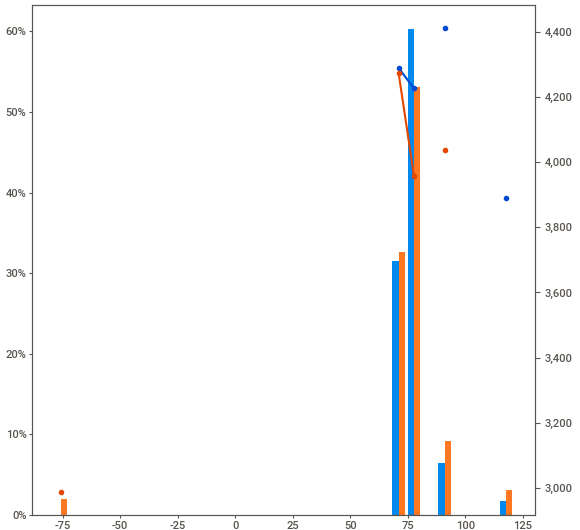
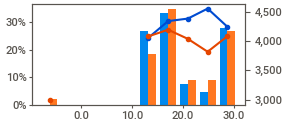
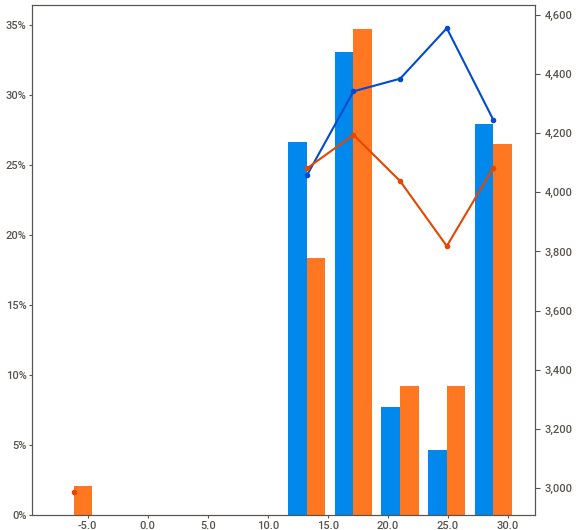
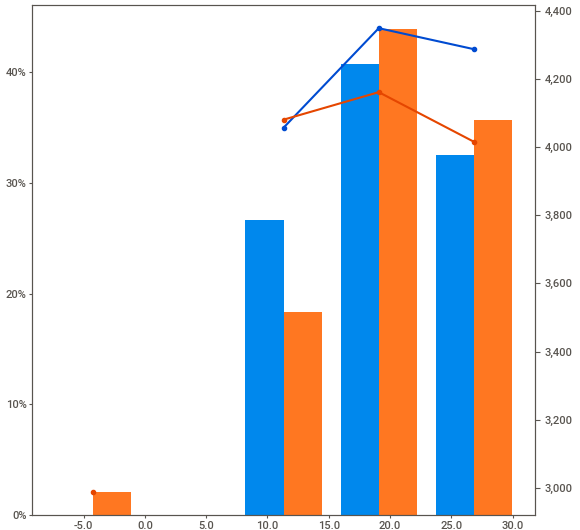
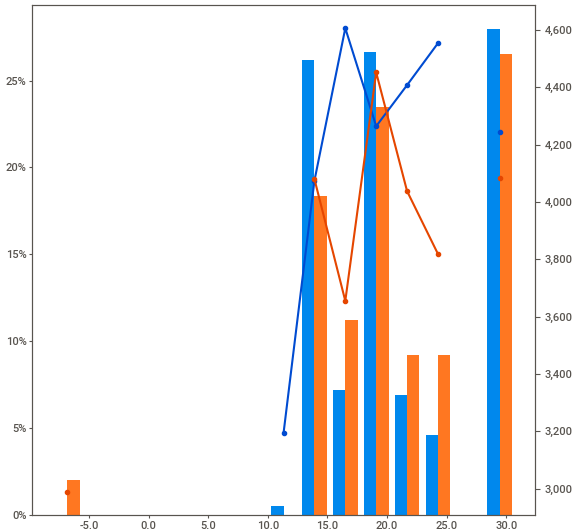
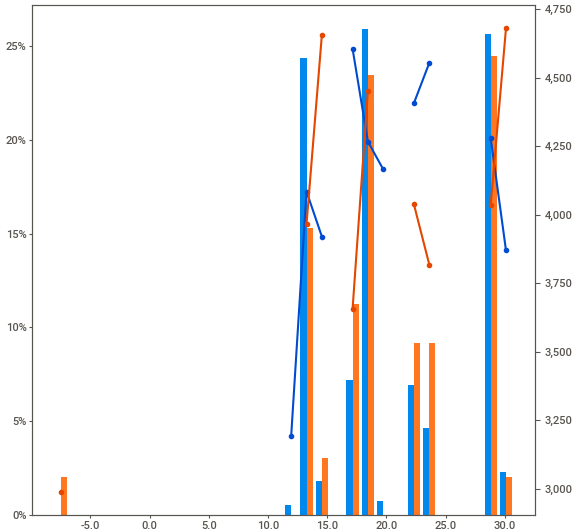
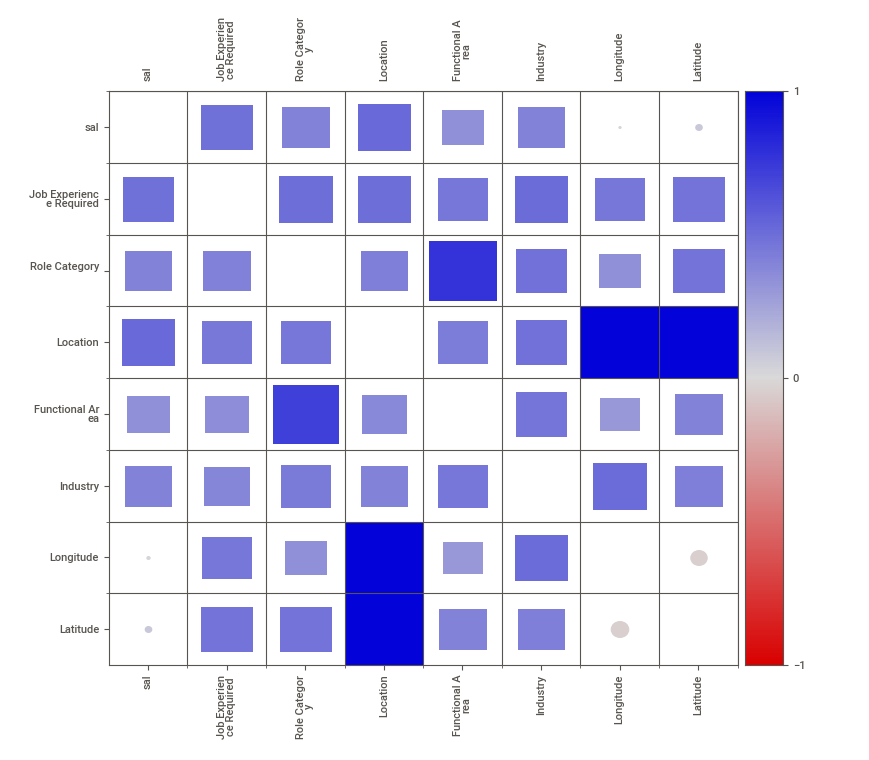
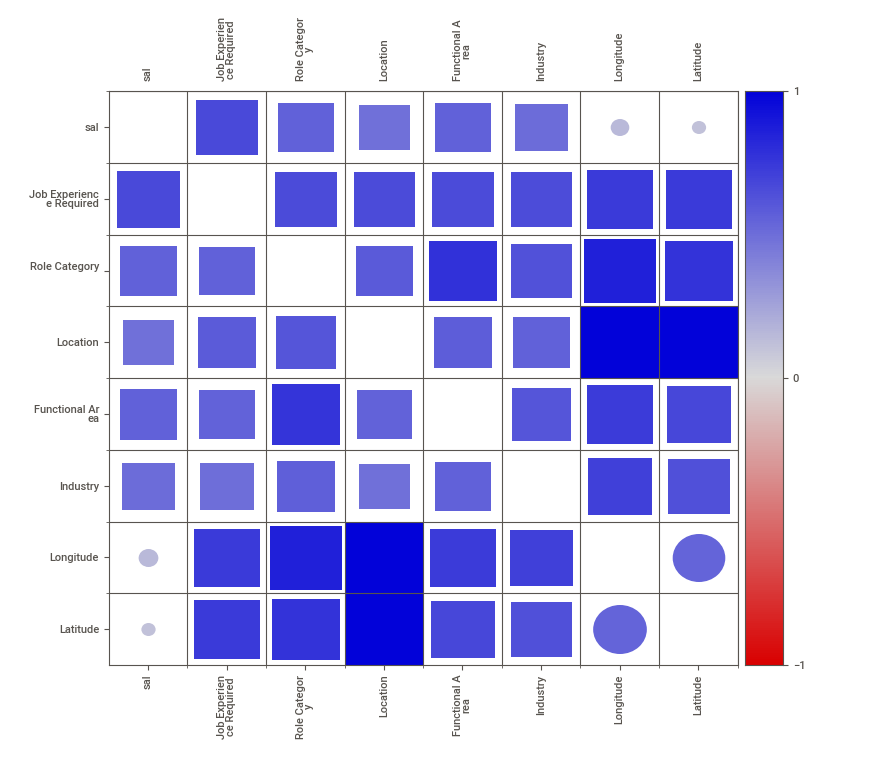

In [18]:
import sweetviz as sv

report = sv.compare(train_data,test_data,'sal')
report.show_notebook()

In [19]:
!pip install AutoViz
!pip install xlrd
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
visions 0.7.6 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Imported v0.1.901. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30,

Shape of your Data Set loaded: (489, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : ['Longitude', 'Latitude']
    Integer-Categorical Columns: ['sal']
    String-Categorical Columns: ['Job Experience Required', 'Role Category', 'Functional Area', 'Industry']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: ['Location', 'Role']
    NLP text Columns: ['Job Title', 'Key Skills']
    Date Time Columns: []
    ID Columns: ['Unnamed: 0']
    Columns that will not be considered in modeling: []
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/datalore/nltk_data...
[nltk_data]    |   Package movie_reviews is a

Data Type 
 Missing Values% 
 Unique Values% 
 Minimum Value 
 Maximum Value 
 DQ Issue 
 
 
 
 
 Unnamed: 0 
 int64 
 0.000000 
 100 
 0.000000 
 499.000000 
 Possible ID column: drop before modeling step. 
 
 
 Job Title 
 object 
 0.000000 
 96 
 
 
 No issue 
 
 
 Job Experience Required 
 object 
 0.000000 
 15 
 
 
 43 rare categories: Too many to list. Group them into a single category or drop the categories. 
 
 
 Key Skills 
 object 
 0.000000 
 95 
 
 
 No issue 
 
 
 Role Category 
 object 
 5.316973 
 12 
 
 
 26 missing values. Impute them with mean, median, mode, or a constant value such as 123., 40 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float, 
 
 
 Location 
 object 
 0.000000 
 20 
 
 
 Possible high cardinality column with 101 unique values: Use hash encoding or text embedding to reduce dimension. 
 
 
 Functional Area 
 object 
 0.000000 
 8 
 
 
 17 rare categories: Too many to list. Group them into a single category or drop the categories. 
 
 
 Industry 
 object 
 0.000000 
 10 
 
 
 34 rare categories: Too many to list. Group them into a single category or drop the categories. 
 
 
 Role 
 object 
 0.613497 
 28 
 
 
 3 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 138 unique values: Use hash encoding or text embedding to reduce dimension. 
 
 
 Longitude 
 float64 
 5.521472 
 NA 
 -79.030572 
 121.097753 
 27 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 43 outliers greater than upper bound (83.19) or lower than lower bound(68.25). Cap them or remove them. 
 
 
 Latitude 
 float64 
 5.521472 
 NA 
 -8.123729 
 30.744272 
 27 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1 outliers greater than upper bound (45.03) or lower than lower bound(0.76). Cap them or remove them. 
 
 
 sal 
 int64 
 0.000000 
 95 
 1510.000000 
 6991.000000 
 No issue

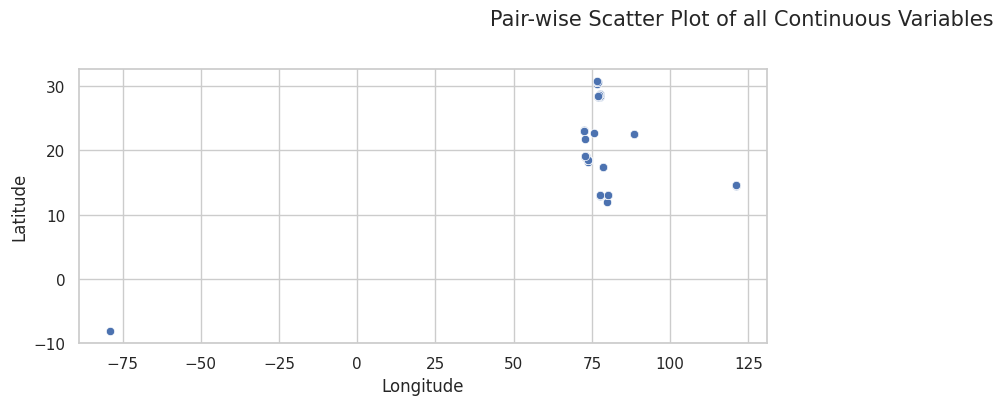

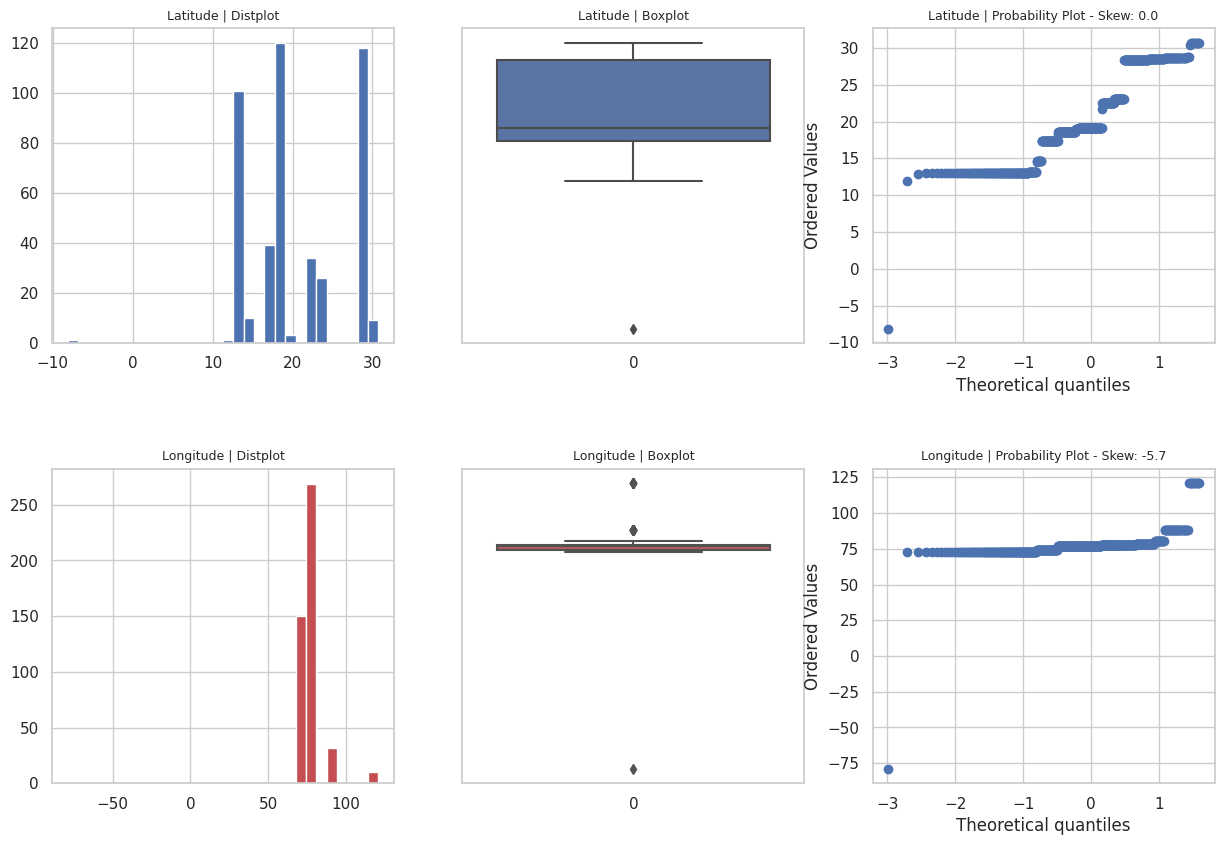

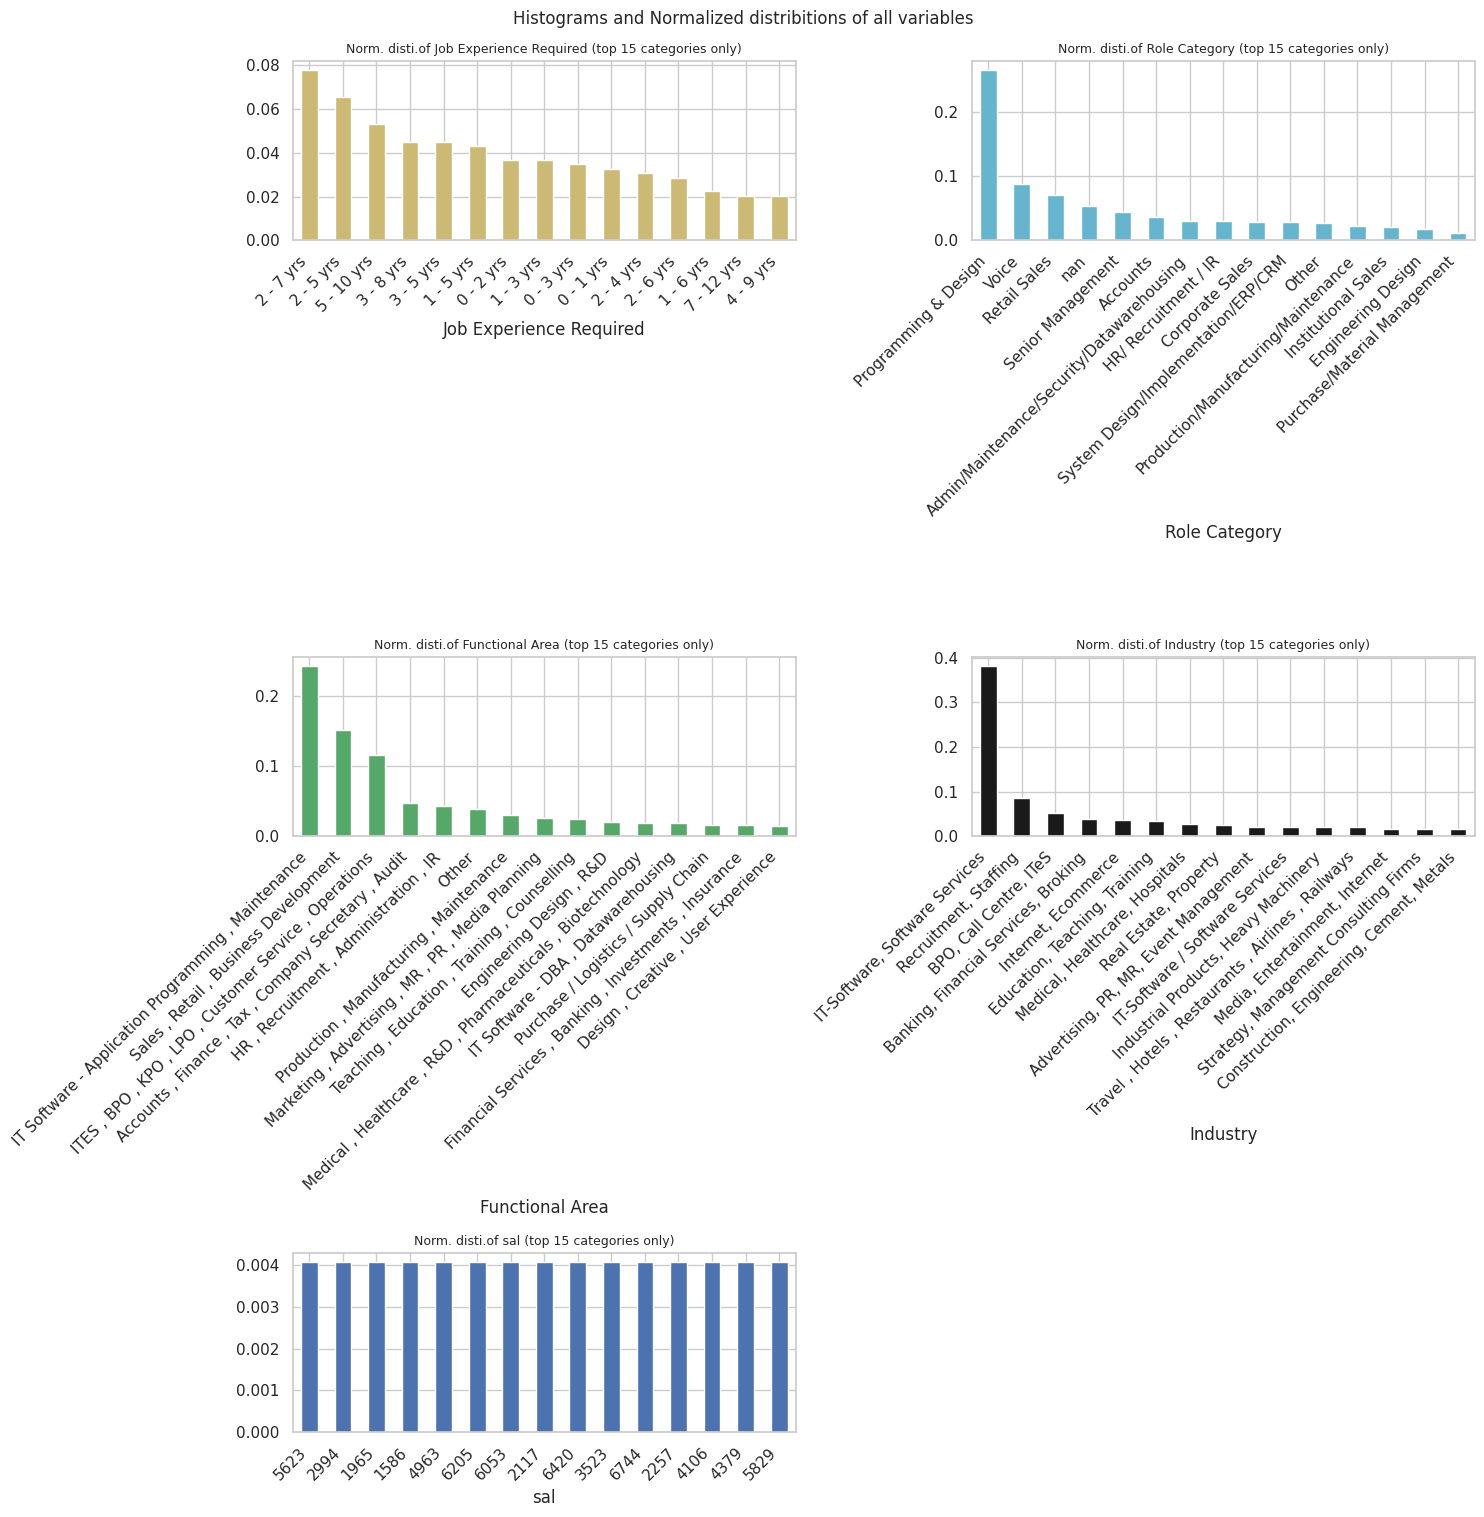

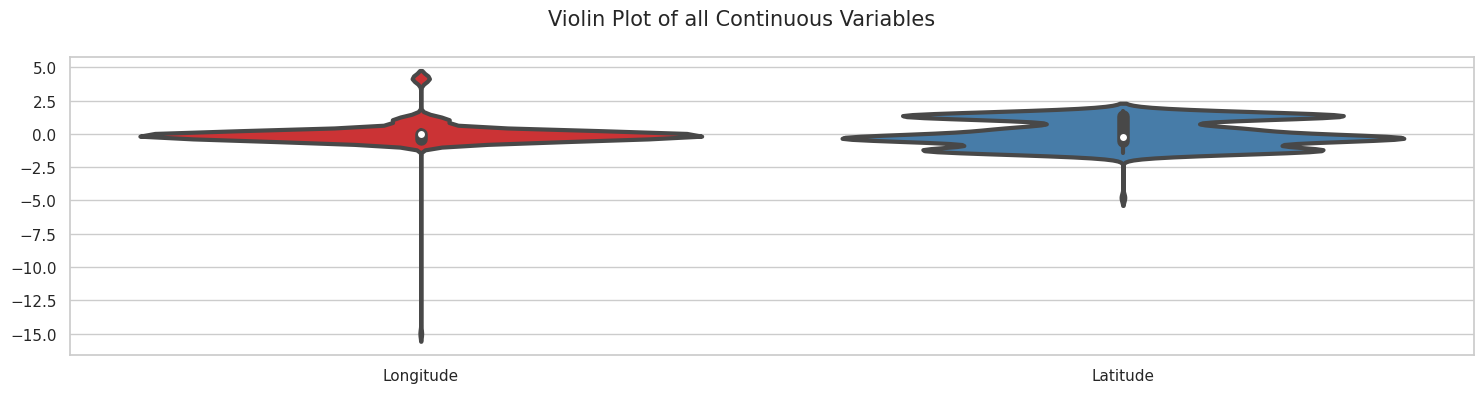

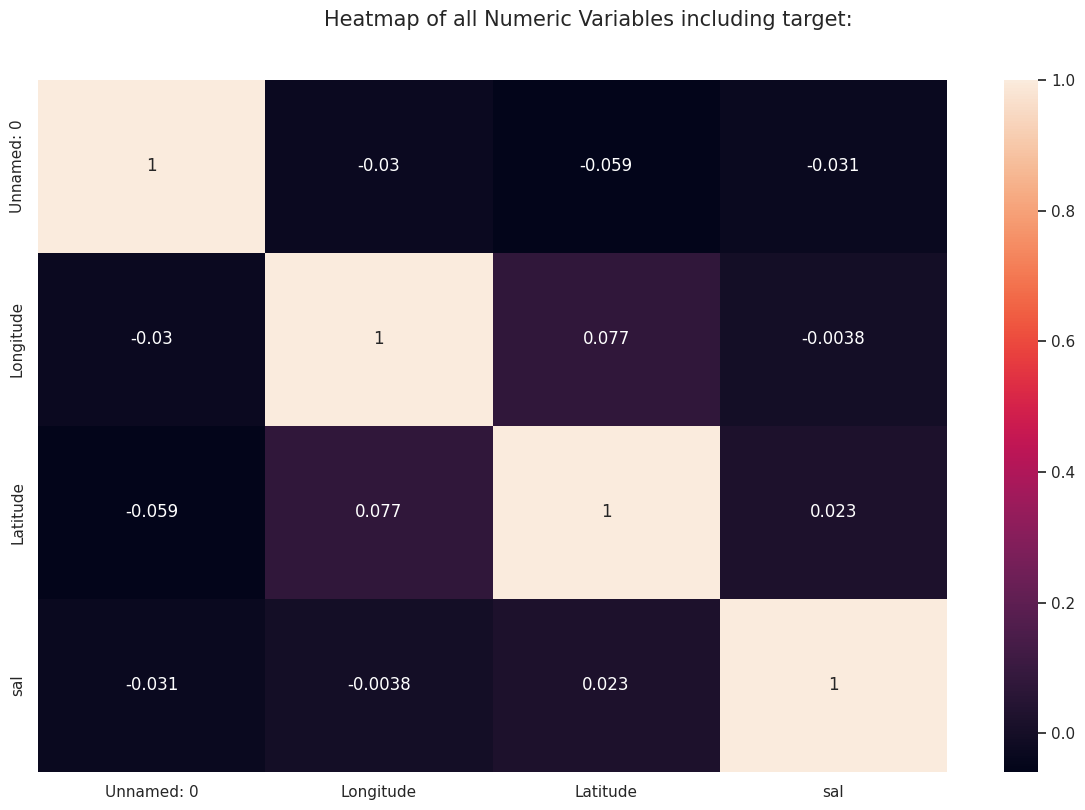

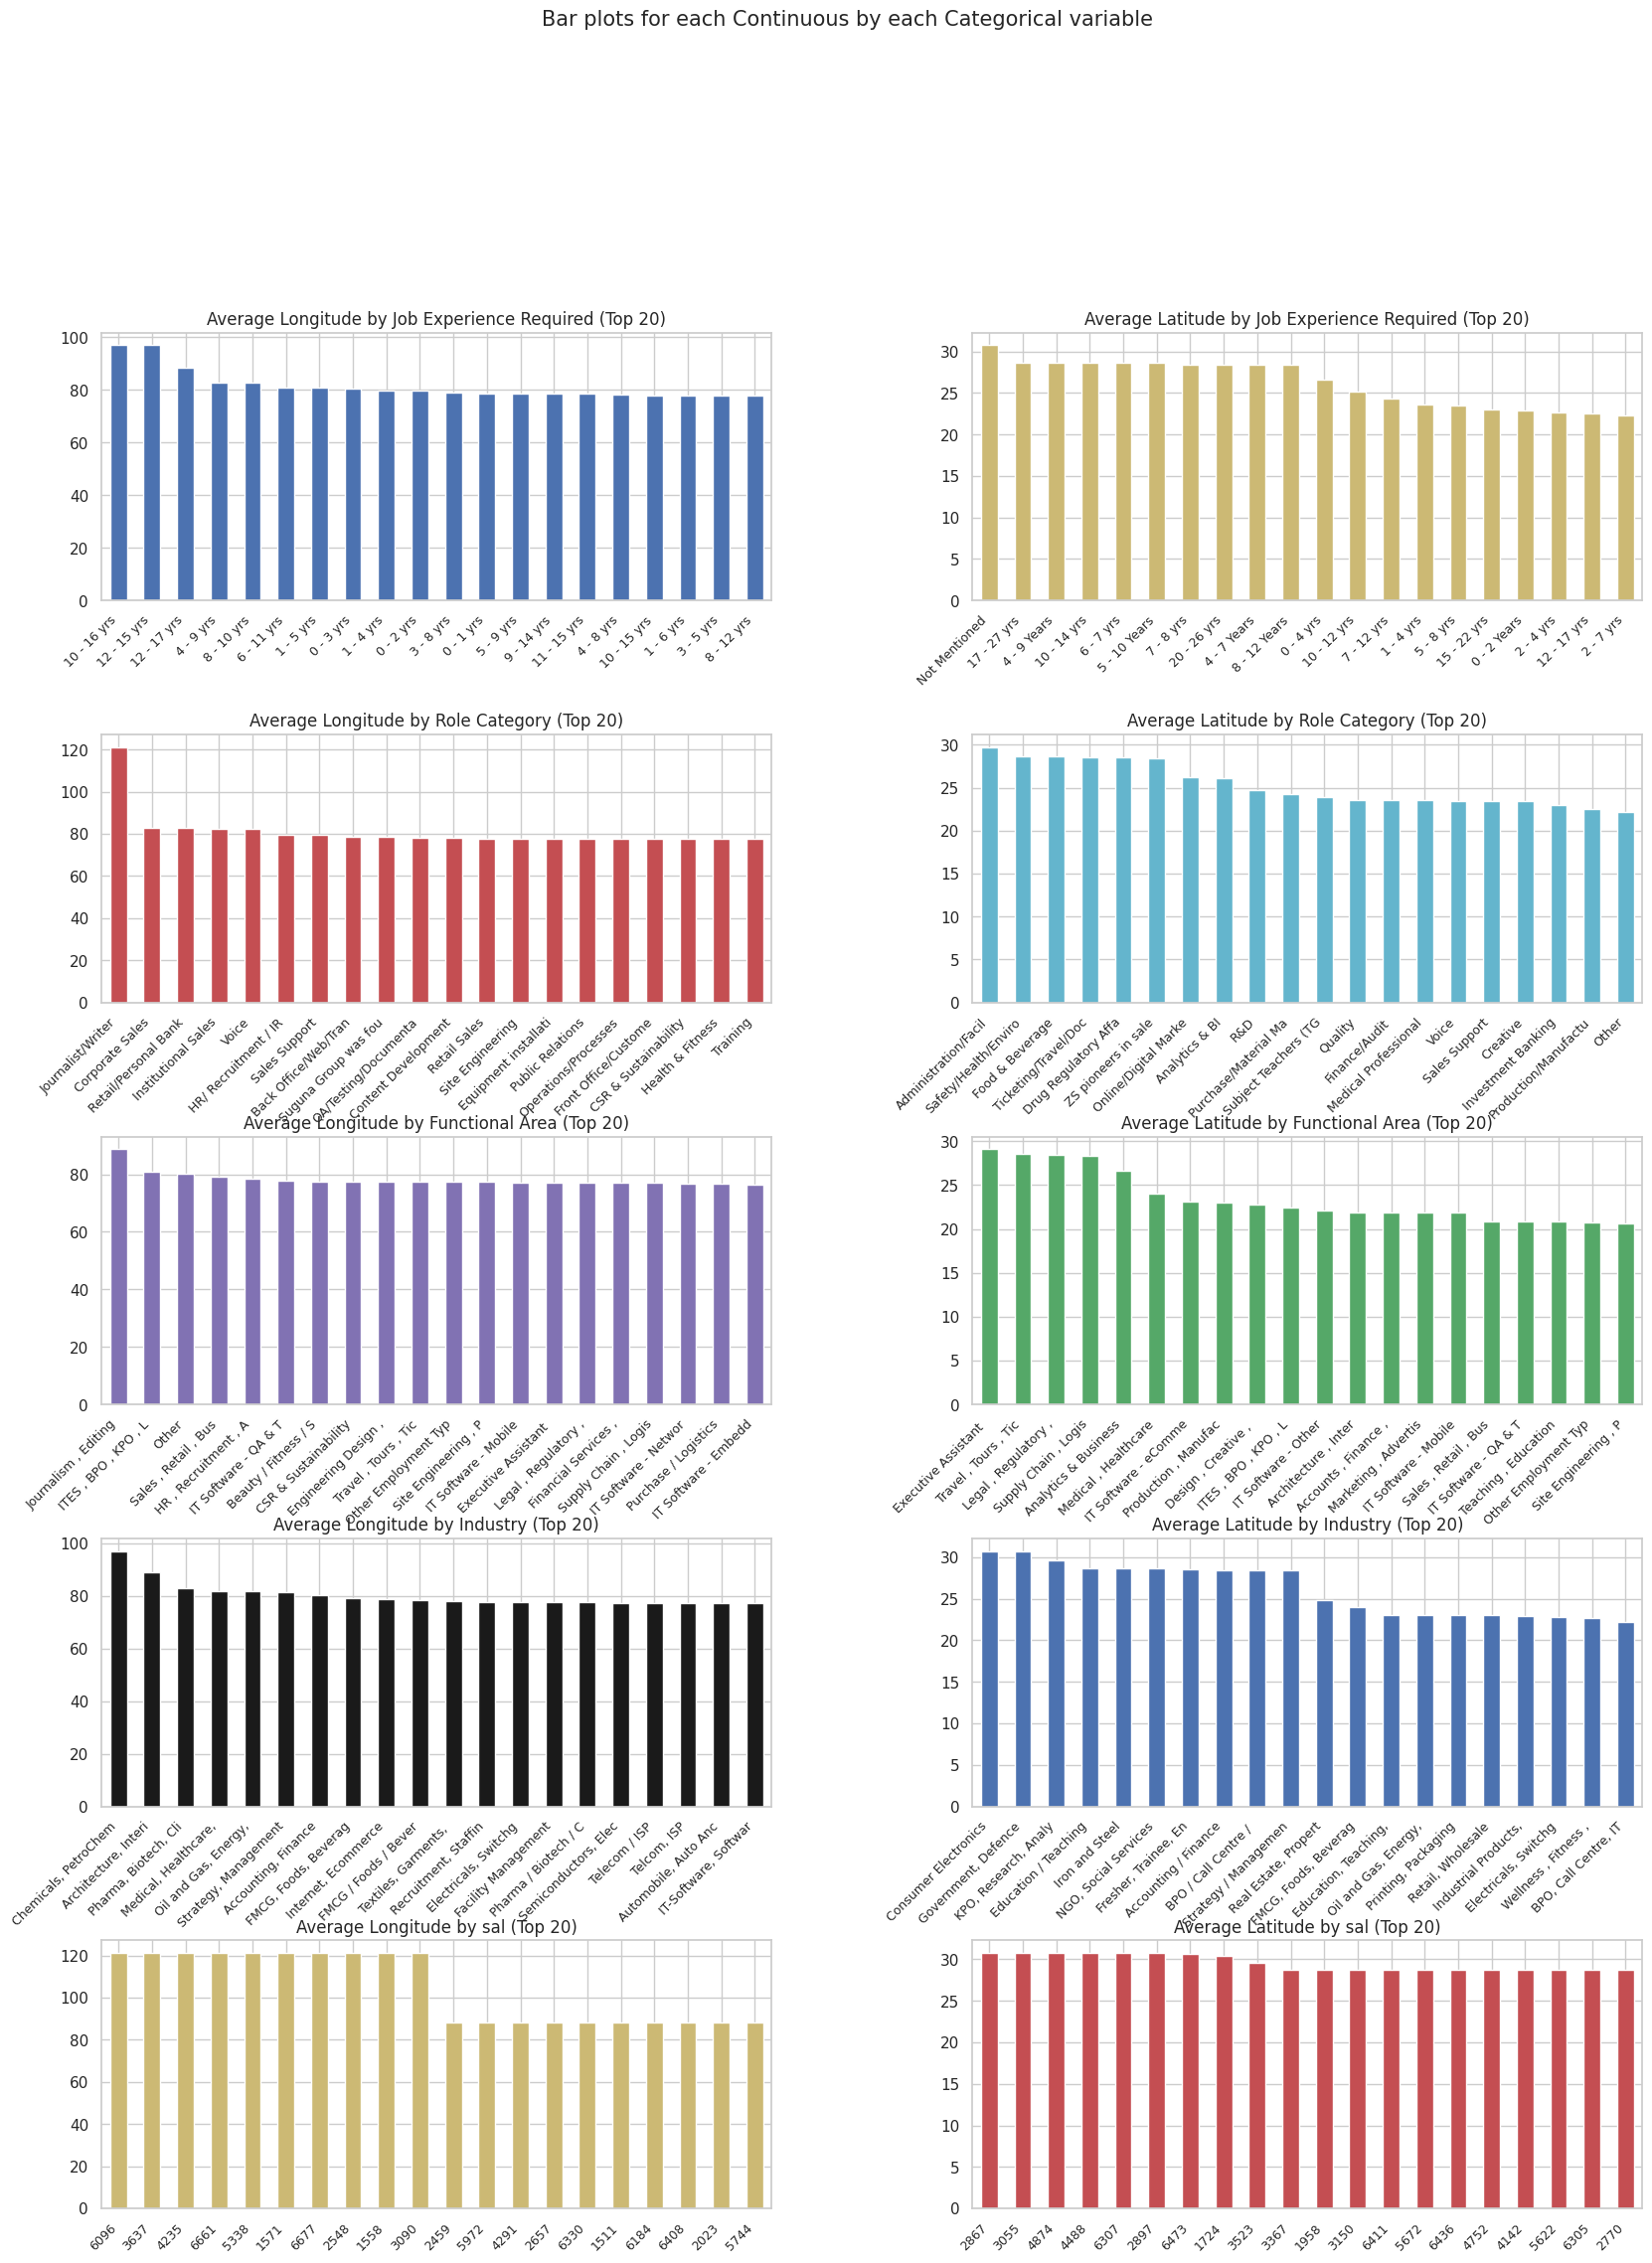

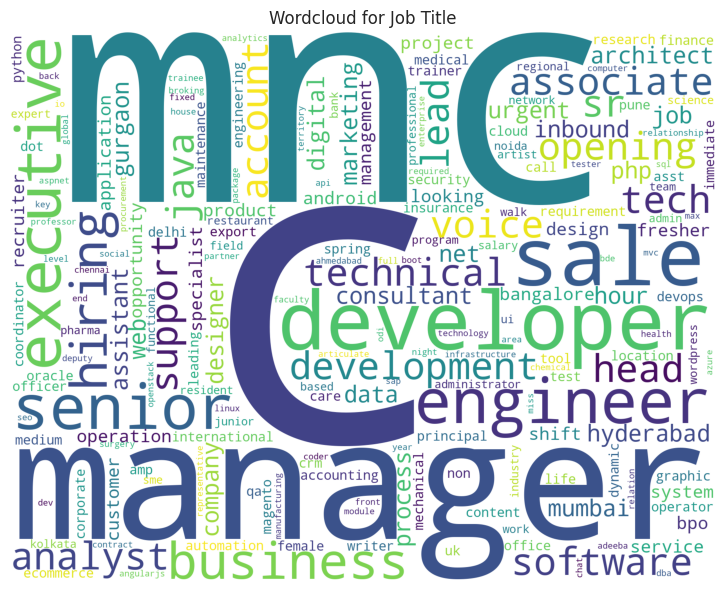

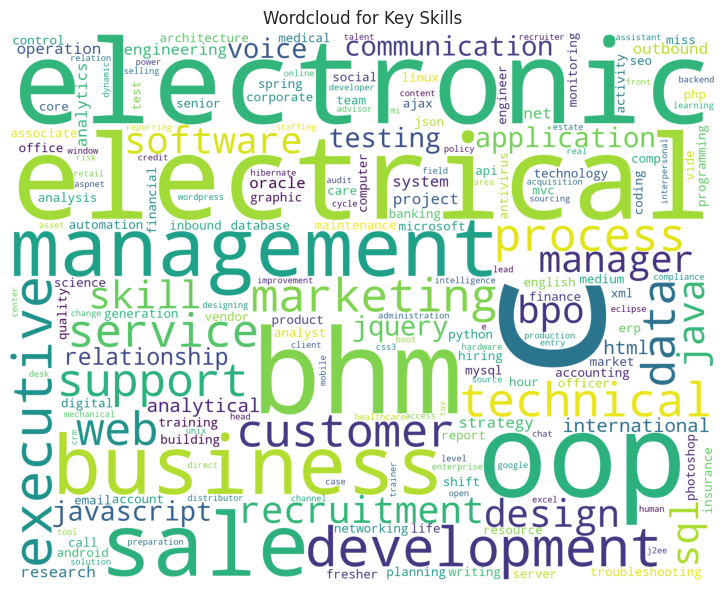

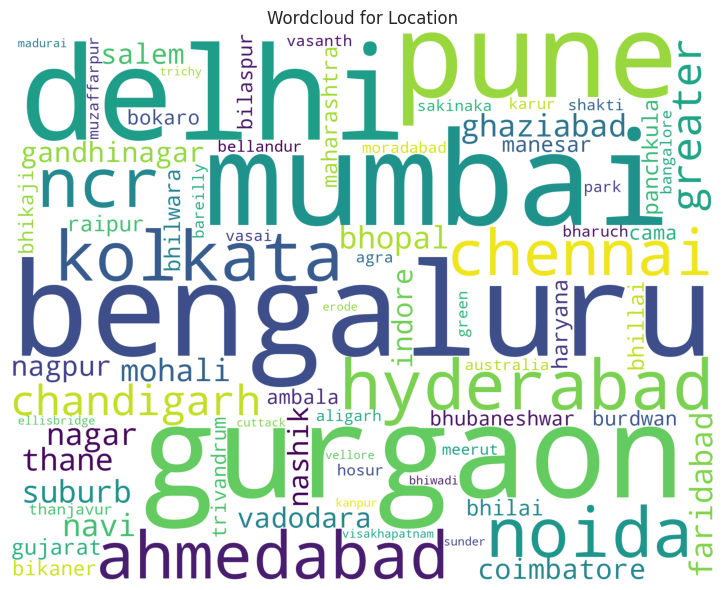

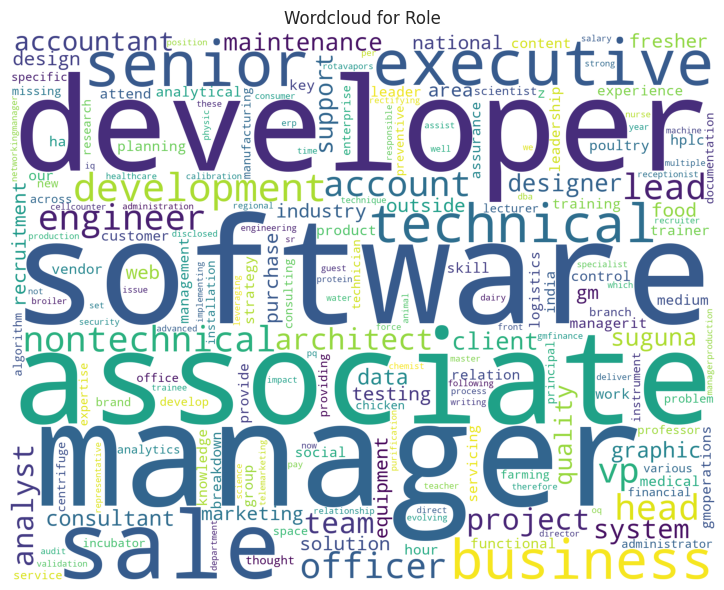

In [20]:
AV = AutoViz_Class()
vl = AV.AutoViz(filename="jobs-edited.csv",
    dfte=None, verbose=2,lowess=False, chart_format='svg',)

In [21]:
pip install ydata-profiling

  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.902 requires pandas<2.0, but you have pandas 2.0.3 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
from ydata_profiling import ProfileReport

profile = ProfileReport(job, title="Profiling Report")
profile

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling v4.8.3"><meta name=url content=https://github.com/ydataai/ydata-profiling><meta name=date content="2024-06-17 20:12:03.514415"><title>Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) format('woff2'),url(../fonts/glyph

In [23]:

feas = ["Job Title", "Job Experience Required", "Key Skills", "Role Category", "Location", "Functional Area","Industry","Role"]

for col in tqdm(feas):
    map_dict = dict(zip(job[col].unique(), range(job[col].nunique())))
    
    job[col] = job[col].map(map_dict)
   
    job[f'{col}_count'] = job[col].map(job[col].value_counts())
    job.head()

In [24]:
job.head()

Job Title 
 Job Experience Required 
 Key Skills 
 Role Category 
 Location 
 Functional Area 
 Industry 
 Role 
 Longitude 
 Latitude 
 sal 
 Job Title_count 
 Job Experience Required_count 
 Key Skills_count 
 Role Category_count 
 Location_count 
 Functional Area_count 
 Industry_count 
 Role_count 
 
 
 
 
 0 
 0 
 0 
 0 
 0.0 
 0 
 0 
 0 
 0.0 
 72.877393 
 19.075990 
 3855 
 1 
 26 
 1 
 3.0 
 58 
 13 
 10 
 1.0 
 
 
 1 
 1 
 1 
 1 
 1.0 
 1 
 1 
 1 
 1.0 
 73.854454 
 18.521428 
 2639 
 1 
 32 
 1 
 35.0 
 1 
 74 
 187 
 16.0 
 
 
 2 
 2 
 2 
 2 
 2.0 
 2 
 2 
 2 
 2.0 
 77.002700 
 28.428262 
 2156 
 1 
 16 
 1 
 3.0 
 38 
 10 
 42 
 1.0 
 
 
 3 
 3 
 3 
 3 
 3.0 
 0 
 3 
 1 
 3.0 
 72.877393 
 19.075990 
 4059 
 1 
 7 
 1 
 15.0 
 58 
 119 
 187 
 6.0 
 
 
 4 
 4 
 1 
 4 
 4.0 
 3 
 4 
 1 
 4.0 
 78.474061 
 17.360589 
 5347 
 1 
 32 
 1 
 130.0 
 37 
 7 
 187 
 7.0

## Conclusion 

Thanks to the different libraries capabilities, we could determine how can we improve the structure of the dataset for further analysis.

On the other hand, we could see what are the main role categores, skills, required job experience, etc... present in these job postings. 

Regarding our Matching algorithm project we can use this data in future to determine the best possible structure for job postings in our platform. 